##  ggplot2

ggplot2 has several advantages:
* Plot specification at a high level of abstraction
* Very flexible
* Theme system for polishing plot appearance
* Mature and complete graphics system

What ggplot2 not ideal for:
* Interactive graphics
* Graph Theory Plots (Graph Nodes)
* 3-D Graphics

** Anatomy of ggplot2 **
![](grammar_layers.png)

In [2]:
# import ggplot2
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [3]:
library(data.table)
# You may need to put the entire file path to the downloaded csv file!
df <- fread('state_real_estate_data.csv')

In [4]:
head(df)

State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index
AK,West,20101,224952,160599,64352,28.6,1.481,1.552
AK,West,20102,225511,160252,65259,28.9,1.484,1.576
AK,West,20093,225820,163791,62029,27.5,1.486,1.494
AK,West,20094,224994,161787,63207,28.1,1.481,1.524
AK,West,20074,234590,155400,79190,33.8,1.544,1.885
AK,West,20081,233714,157458,76256,32.6,1.538,1.817


In [5]:
tail(df)

State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index
DC,NA,20092,630361,148268,482092,76.5,2.409,2.802
DC,NA,20093,632103,148074,484029,76.6,2.415,2.817
DC,NA,20114,676463,165456,511007,75.5,2.585,3.025
DC,NA,20121,690234,166701,523532,75.8,2.637,3.107
DC,NA,20122,705645,167978,537666,76.2,2.696,3.198
DC,NA,20123,722514,169289,553225,76.6,2.761,3.299


In [6]:
str(df)

Classes 'data.table' and 'data.frame':	7803 obs. of  9 variables:
 $ State           : chr  "AK" "AK" "AK" "AK" ...
 $ region          : chr  "West" "West" "West" "West" ...
 $ Date            : int  20101 20102 20093 20094 20074 20081 20082 20083 20084 20091 ...
 $ Home.Value      : int  224952 225511 225820 224994 234590 233714 232999 232164 231039 229395 ...
 $ Structure.Cost  : int  160599 160252 163791 161787 155400 157458 160092 162704 164739 165424 ...
 $ Land.Value      : int  64352 65259 62029 63207 79190 76256 72906 69460 66299 63971 ...
 $ Land.Share..Pct.: num  28.6 28.9 27.5 28.1 33.8 32.6 31.3 29.9 28.7 27.9 ...
 $ Home.Price.Index: num  1.48 1.48 1.49 1.48 1.54 ...
 $ Land.Price.Index: num  1.55 1.58 1.49 1.52 1.88 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [7]:
summary(df)

    State              region               Date         Home.Value    
 Length:7803        Length:7803        Min.   :19751   Min.   : 18763  
 Class :character   Class :character   1st Qu.:19843   1st Qu.: 62235  
 Mode  :character   Mode  :character   Median :19941   Median :108724  
                                       Mean   :19939   Mean   :135313  
                                       3rd Qu.:20033   3rd Qu.:172031  
                                       Max.   :20131   Max.   :862885  
 Structure.Cost     Land.Value     Land.Share..Pct. Home.Price.Index
 Min.   : 17825   Min.   :   938   Min.   : 5.00    Min.   :0.1350  
 1st Qu.: 53777   1st Qu.:  4178   1st Qu.: 5.00    1st Qu.:0.4550  
 Median : 88352   Median :  9478   Median :10.40    Median :0.7830  
 Mean   : 99534   Mean   : 35779   Mean   :18.17    Mean   :0.8695  
 3rd Qu.:134871   3rd Qu.: 38631   3rd Qu.:26.30    3rd Qu.:1.2075  
 Max.   :325595   Max.   :594417   Max.   :81.70    Max.   :2.8930  
 Land.Price.I

### Using ggplot2

Histograms are a great way of quickly exploring your data! We have a couple of options for quickly producing histograms off the columns of a data frame. We have:
* hist()
* qplot()
* ggplot()
They differ mainly in one main component, for each of these methods you usually trade-off ease of use for ability to customize.

Note! In RStudio you'll need to call print(plot_name) to display your plots. Also the plots will look a lot better in RStudio than here in the notes.
Let's show quick use cases of each:

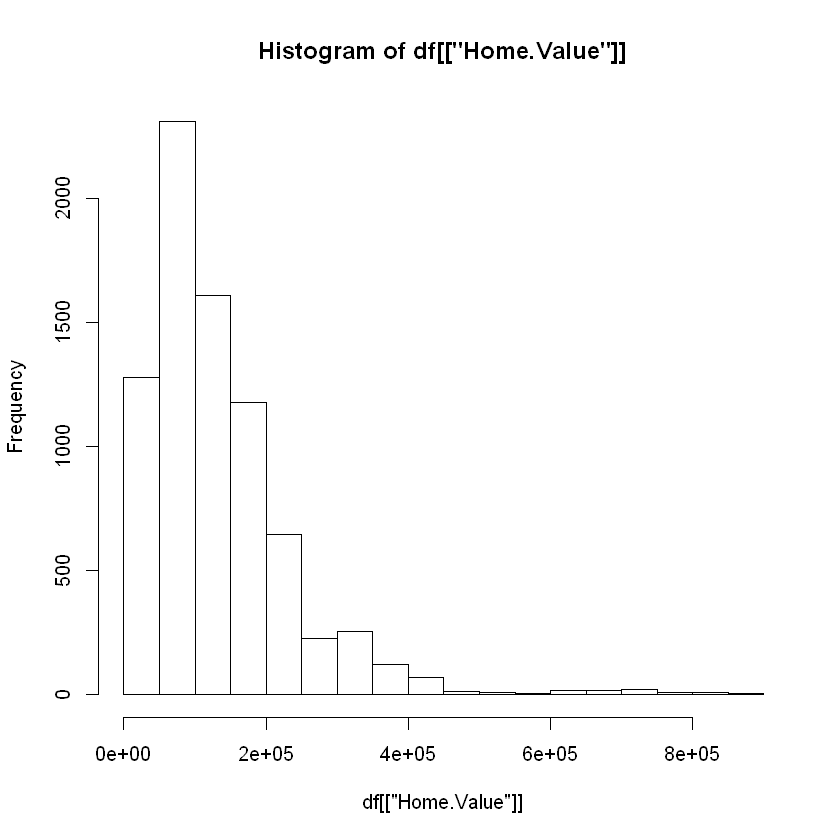

In [8]:
# Pass a column straight into hist()
hist(df[['Home.Value']])

#### Using qplot
Notice the auto-adjustment of the color theme and the binwidth.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


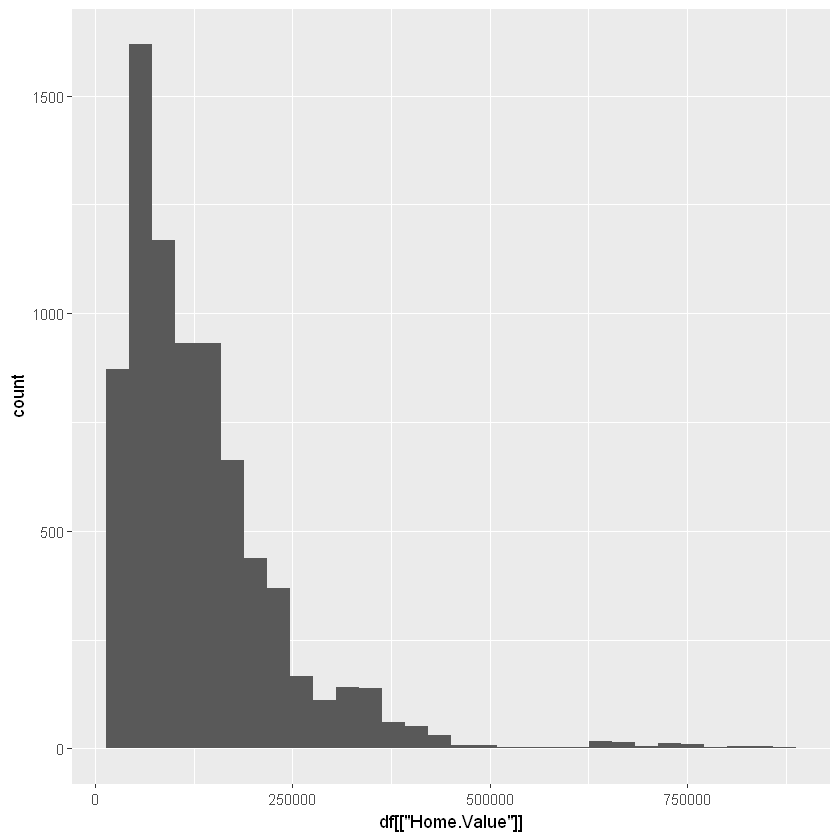

In [9]:
qplot(df[['Home.Value']])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


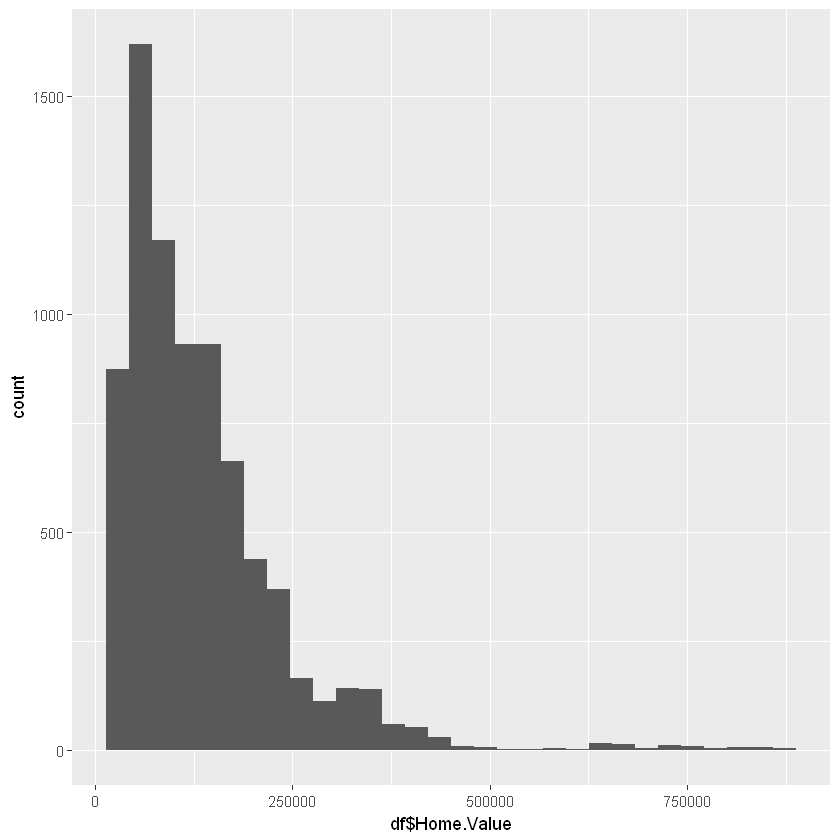

In [10]:
# Using ggplot, lots of ability to customize, but bit more complicated!
ggplot(data = df,aes(df$Home.Value))+geom_histogram()

#### Quick Example of Customization
Let's explore qplot further! In the last example we just passed a single column and qplot automatically knew to do a histogram, from now on we're going to be a little more formal and pass in the entire data source and then specify what columns to grab and how to plot it:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 94 rows containing non-finite values (stat_bin)."

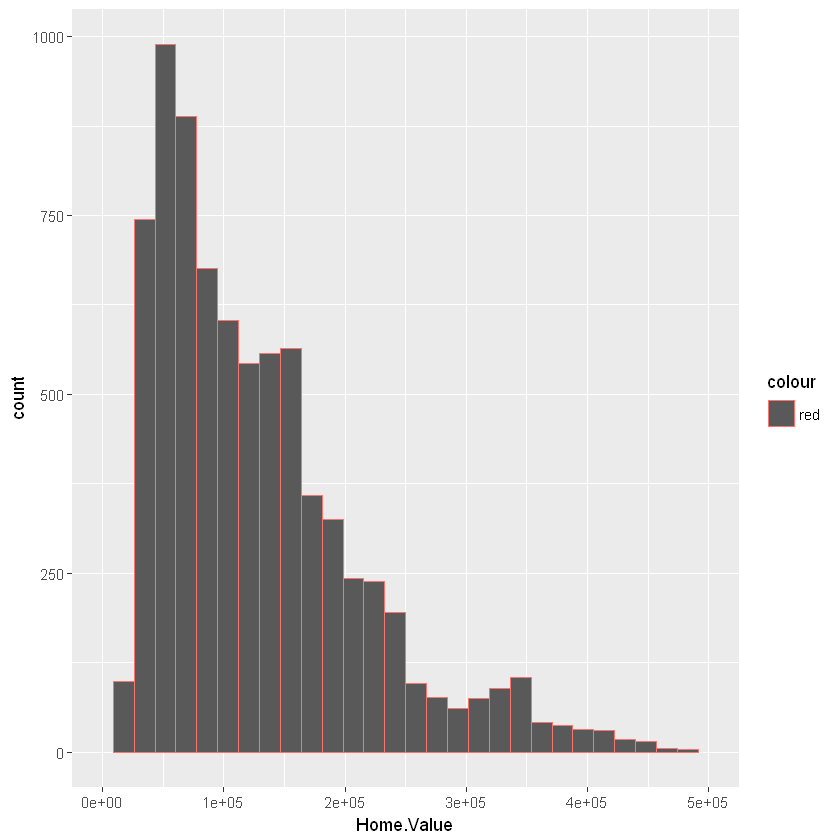

In [11]:
# Customize the histogram further
qplot(data=df,x=Home.Value,geom = 'histogram',xlim=c(0,500000), color='red')